In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#나눔 고딕 적용
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
\
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')
\
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

matplotlib.rc("axes", unicode_minus = False)
from sklearn.model_selection import train_test_split
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split, LeavePOut
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import KFold
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [99]:
def measure(clf, x_test, y_test, target_name=None):
    y_pred = clf.predict(x_test)
    report = classification_report(y_test, y_pred, target_names=target_name)
    print("분류 보고서:\n")
    print(report)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_name)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

In [100]:
df_raw = pd.read_csv("../data/Customer_data.csv", encoding="euc-kr")

In [101]:
save_path = "/home/piai/빅데이터프로젝트/data"
file_name1 = "../data/preprocessed_v1.0.csv"
file_name2 = "../data/Charge_data.csv"
df1 = pd.read_csv(os.path.join(save_path, file_name1), encoding="euc-kr")

In [102]:
df2 = pd.read_csv(os.path.join(save_path, file_name2), encoding="euc-kr")

In [103]:
df_raw.head()

,고객ID,성별,연령,결혼여부,부양자유무,부양자수,추천횟수,영수증발급여부,과금방식,보안서비스,...,종료일,고객이탈여부,이탈가능점수,이탈유형,이탈사유,LTV,만족도,데이터사용료,로밍사용료,총로밍요금
0,C-10001,여성,37,Yes,No,0,2,Yes,신용카드,No,...,NaN,No,65,NaN,NaN,2205,3,0,47910,431100
1,C-10002,남성,46,No,No,0,0,No,신용카드,No,...,NaN,No,66,NaN,NaN,5414,5,11300,12090,108710
2,C-10003,남성,50,No,No,0,0,Yes,계좌이체,No,...,2023-02-01,Yes,71,Competitor,Price too high,4479,1,0,38080,152100
3,C-10004,남성,78,Yes,No,0,1,Yes,계좌이체,No,...,2023-07-01,Yes,99,Dissatisfaction,Product dissatisfaction,3714,1,0,31410,408720
4,C-10005,여성,75,Yes,No,0,3,Yes,신용카드,No,...,2023-10-01,Yes,68,Dissatisfaction,Network reliability,3464,1,0,8360,24970


In [117]:
# 데이터 로드
customer_data = df_raw

billing_data = df2

In [179]:
# Select the required columns from customer_data
selected_columns = ['고객ID', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '영수증발급여부', '과금방식',
                    '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량', "LTV"]

# Merge the dataframes on '고객ID'
merged_data = pd.merge(billing_data, customer_data[selected_columns], on='고객ID', how='left')
df = pd.DataFrame(merged_data)

# 날짜를 datetime 형식으로 변환
df['과금일'] = pd.to_datetime(df['과금일'])
df.head()

,고객ID,과금일,과금액,성별,연령,결혼여부,부양자유무,부양자수,영수증발급여부,과금방식,보안서비스,백업서비스,기술지원서비스,데이터무제한,데이터사용량,LTV
0,C-10001,2022-03-02,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,2205
1,C-10001,2022-04-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,2205
2,C-10001,2022-05-02,85700,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,2205
3,C-10001,2022-06-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,2205
4,C-10001,2022-07-02,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,2205


In [184]:
import numpy as np
import pandas as pd

def nearest_first_day_of_month(date):
    # 주어진 날짜의 월과 연도를 추출합니다.
    month = date.month
    year = date.year
    
    # 해당 월의 1일을 만듭니다.
    first_day_of_month = pd.Timestamp(year, month, 1)
    
    # 주어진 날짜가 해당 월의 1일에 가까운지 확인합니다.
    if date - first_day_of_month <= np.timedelta64(15, 'D'):
        return first_day_of_month
    else:
        # 다음 달의 1일을 반환합니다.
        if month == 12:
            return pd.Timestamp(year + 1, 1, 1)
        else:
            return pd.Timestamp(year, month + 1, 1)

In [185]:
df['과금일'] = df['과금일'].apply(nearest_first_day_of_month)

In [186]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291334 entries, 0 to 291333
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   고객ID       291334 non-null  object        
 1   과금일        291334 non-null  datetime64[ns]
 2   과금액        291334 non-null  int64         
 3   성별         291334 non-null  object        
 4   연령         291334 non-null  int64         
 5   결혼여부       291334 non-null  object        
 6   부양자유무      291334 non-null  object        
 7   부양자수       291334 non-null  int64         
 8   영수증발급여부    291334 non-null  object        
 9   과금방식       291334 non-null  object        
 10  보안서비스      291334 non-null  object        
 11  백업서비스      291334 non-null  object        
 12  기술지원서비스    291334 non-null  object        
 13  데이터무제한     291334 non-null  object        
 14  데이터사용량     291334 non-null  int64         
 15  LTV        291334 non-null  int64         
 16  LTV>=4000  291334 no

In [122]:
# 과금일을 날짜형으로 변환
df['과금일'] = pd.to_datetime(df['과금일'])

# 고객별 과금 월 수 계산
df['과금월수'] = df.groupby('고객ID')['과금일'].transform('nunique')

# 고객ID별로 첫 번째 행만 남기기
df_unique = df.drop_duplicates(subset=['고객ID'])

selected_columns = ['고객ID', '성별', '연령', '결혼여부']
df_months = pd.merge(df_unique.drop(['과금일', '과금액'], axis=1), customer_data[selected_columns], on='고객ID', how='right')

# 결과 출력
df_months.shape

(6863, 17)

<Axes: xlabel='과금월수', ylabel='Count'>

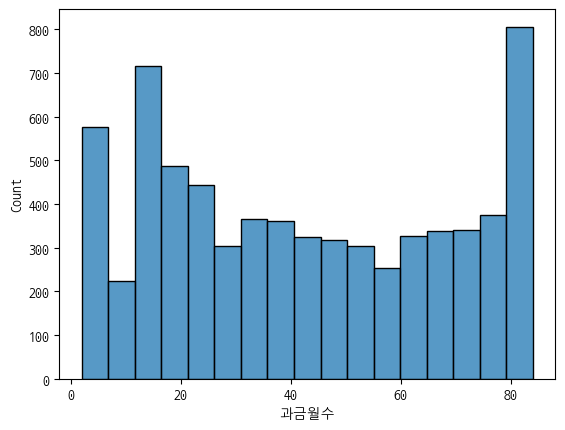

In [123]:
sns.histplot(data=df_months["과금월수"])

In [124]:
df_months.describe()

,연령_x,부양자수,데이터사용량,과금월수,연령_y
count,6863.000000,6863.000000,6863.000000,6863.000000,6863.000000
mean,46.606877,0.411482,20.507358,42.449949,46.606877
std,16.581750,0.879672,20.424957,26.246790,16.581750
min,20.000000,0.000000,0.000000,2.000000,20.000000
25%,32.000000,0.000000,3.000000,19.000000,32.000000
50%,46.000000,0.000000,17.000000,40.000000,46.000000
75%,60.000000,0.000000,27.000000,67.000000,60.000000
max,80.000000,4.000000,85.000000,84.000000,80.000000


In [133]:
def get_bin_months(x):
    if x >= 67:
        return "Q3~max"
    elif x>= 40:
        return "Q2~Q3"
    elif x>= 19:
        return "Q1~Q2"
    else:
        return "min~Q1"
merged_data["과금월수_bin"] = merged_data["과금월수"].apply(get_bin_months)
df["과금월수_bin"] = df["과금월수"].apply(get_bin_months)

In [134]:
# Check for duplicate rows
duplicate_rows = merged_data[merged_data.duplicated()]

# Print duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [135]:
# Remove duplicate rows
merged_data.drop_duplicates(inplace=True)

# Confirm removal of duplicate rows
print("Duplicate rows removed successfully.")


Duplicate rows removed successfully.


In [136]:
merged_data.shape

(291334, 17)

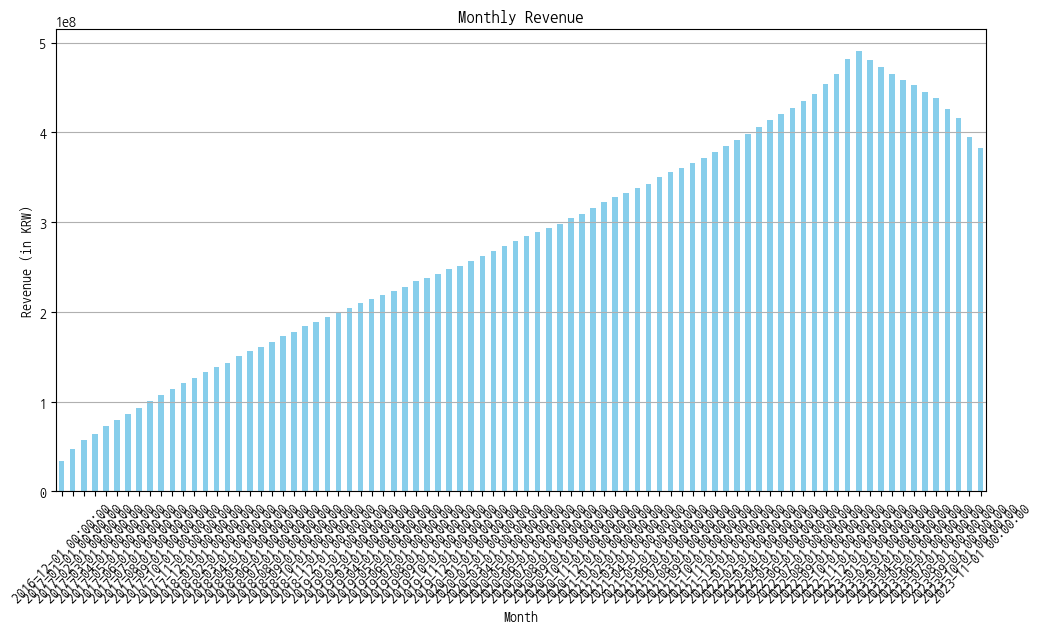

In [137]:
# Group by year and month and sum the '과금액'
monthly_revenue = merged_data.groupby('과금일')['과금액'].sum()

# Plotting the monthly revenue
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (in KRW)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

과금일
2016-12-01     356
2017-01-01     520
2017-02-01     629
2017-03-01     718
2017-04-01     815
              ... 
2023-07-01    5887
2023-08-01    5747
2023-09-01    5638
2023-10-01    5403
2023-11-01    5265
Name: 고객ID, Length: 84, dtype: int64


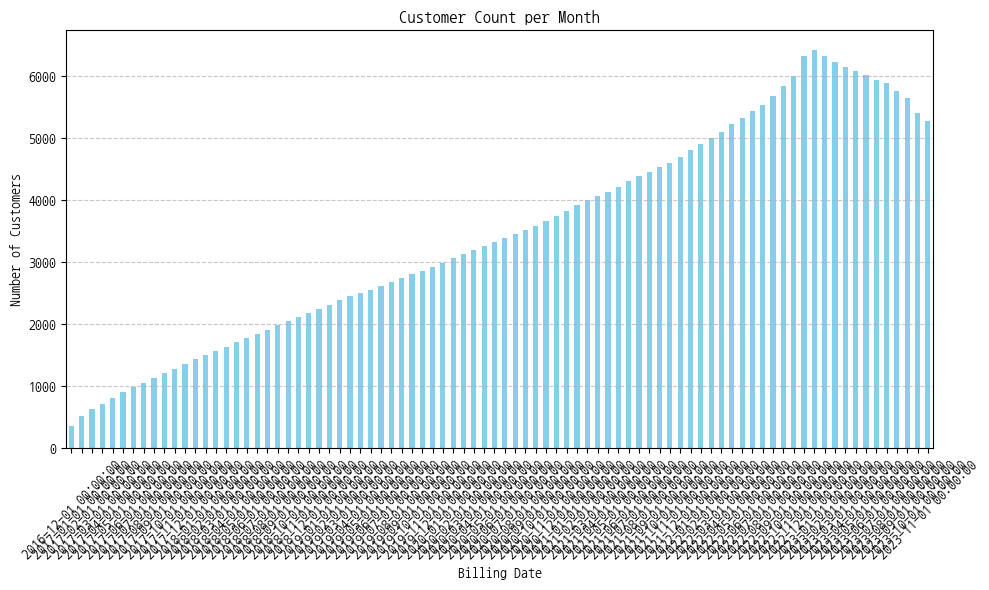

In [138]:
# Count the number of customers for each month
customer_count_per_month = merged_data.groupby('과금일')['고객ID'].nunique()

# Display the result
print(customer_count_per_month)
# Plotting
plt.figure(figsize=(10, 6))
customer_count_per_month.plot(kind='bar', color='skyblue')
plt.title('Customer Count per Month')
plt.xlabel('Billing Date')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

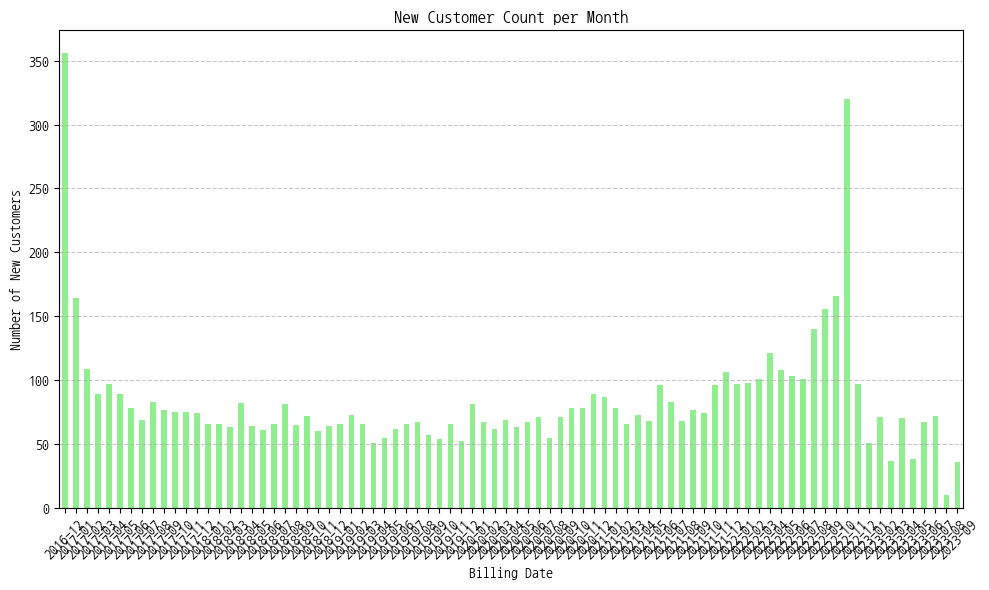

In [139]:
# Find the first billing month for each customer
first_billing_month_per_customer = merged_data.groupby('고객ID')['과금일'].min()

# Count the number of new customers for each month
new_customers_per_month = first_billing_month_per_customer.groupby(first_billing_month_per_customer.dt.to_period('M')).count()

# Plotting
plt.figure(figsize=(10, 6))
new_customers_per_month.plot(kind='bar', color='lightgreen')
plt.title('New Customer Count per Month')
plt.xlabel('Billing Date')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


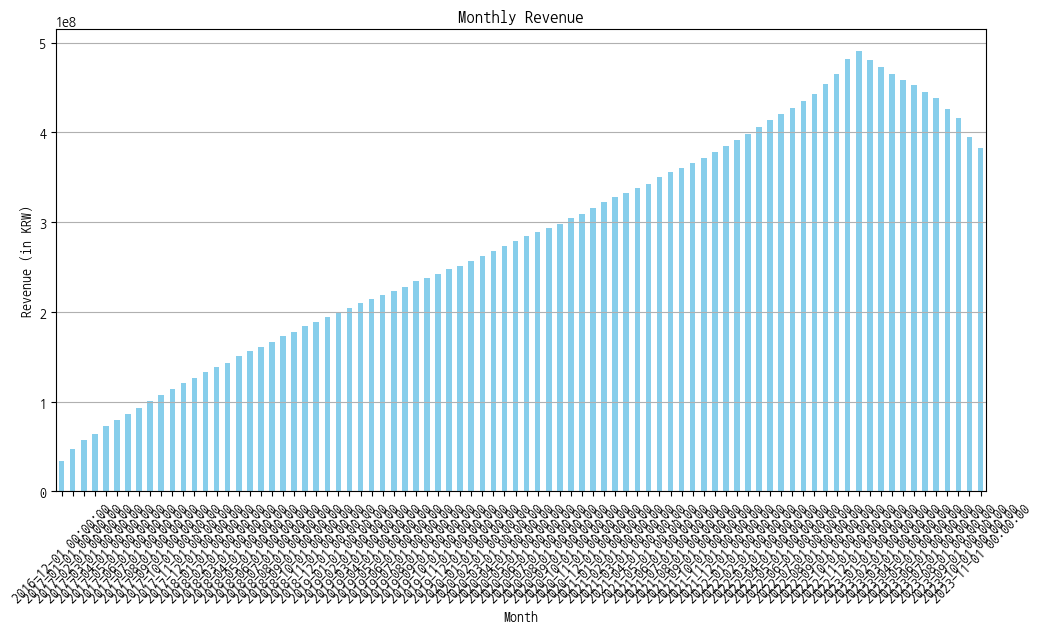

In [140]:
# Group by year and month and sum the '과금액'
monthly_revenue = merged_data.groupby('과금일')['과금액'].sum()

# Plotting the monthly revenue
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (in KRW)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

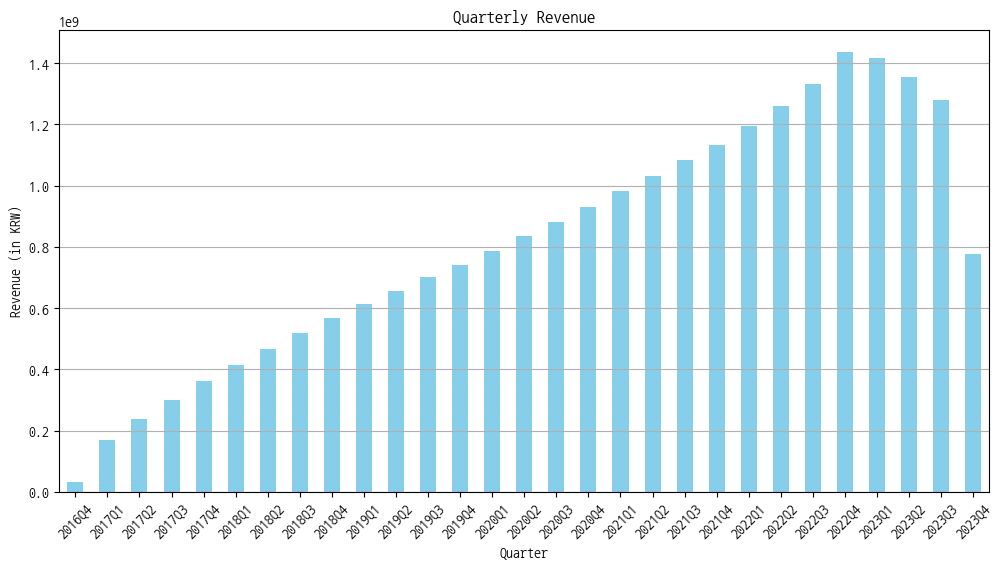

In [141]:
merged_data['과금일_분기별'] = merged_data['과금일'].dt.to_period('Q')

# Group by year and quarter and sum the '과금액'
quarterly_revenue = merged_data.groupby('과금일_분기별')['과금액'].sum()

# Plotting the quarterly revenue
plt.figure(figsize=(12, 6))
quarterly_revenue.plot(kind='bar', color='skyblue')
plt.title('Quarterly Revenue')
plt.xlabel('Quarter')
plt.ylabel('Revenue (in KRW)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [142]:
merged_data.head()

,고객ID,과금일,과금액,성별,연령,결혼여부,부양자유무,부양자수,영수증발급여부,과금방식,보안서비스,백업서비스,기술지원서비스,데이터무제한,데이터사용량,과금월수,과금월수_bin,과금일_분기별
0,C-10001,2022-03-01,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,Q1~Q2,2022Q1
1,C-10001,2022-04-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,Q1~Q2,2022Q2
2,C-10001,2022-05-01,85700,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,Q1~Q2,2022Q2
3,C-10001,2022-06-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,Q1~Q2,2022Q2
4,C-10001,2022-07-01,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,Q1~Q2,2022Q3


In [143]:
merged_data.columns

Index(['고객ID', '과금일', '과금액', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '영수증발급여부',
       '과금방식', '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량', '과금월수',
       '과금월수_bin', '과금일_분기별'],
      dtype='object')

In [144]:
merged_data.head()

,고객ID,과금일,과금액,성별,연령,결혼여부,부양자유무,부양자수,영수증발급여부,과금방식,보안서비스,백업서비스,기술지원서비스,데이터무제한,데이터사용량,과금월수,과금월수_bin,과금일_분기별
0,C-10001,2022-03-01,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,Q1~Q2,2022Q1
1,C-10001,2022-04-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,Q1~Q2,2022Q2
2,C-10001,2022-05-01,85700,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,Q1~Q2,2022Q2
3,C-10001,2022-06-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,Q1~Q2,2022Q2
4,C-10001,2022-07-01,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,Q1~Q2,2022Q3


In [145]:
merged_data.describe()

,과금액,연령,부양자수,데이터사용량,과금월수
count,291334.000000,291334.000000,291334.000000,291334.000000,291334.000000
mean,80657.149183,46.510843,0.482652,20.993238,58.675966
std,36946.287002,16.541125,0.933860,20.767967,21.977940
min,18900.000000,20.000000,0.000000,0.000000,2.000000
25%,47900.000000,32.000000,0.000000,3.000000,42.000000
50%,88700.000000,46.000000,0.000000,17.000000,64.000000
75%,112100.000000,59.000000,0.000000,27.000000,79.000000
max,143200.000000,80.000000,4.000000,85.000000,84.000000


In [146]:
def get_segment_age(x):
    if x >= 60:
        return "60대이상"
    elif x>= 50:
        return '50대'
    elif x>= 40:
        return '40대'
    elif x>= 30:
        return '30대'
    elif x>= 20:
        return '20대'
    elif x>= 10:
        return '10대'

df["연령_bin"] = df["연령"].apply(get_segment_age)

In [147]:
df.head()

,고객ID,과금일,과금액,성별,연령,결혼여부,부양자유무,부양자수,영수증발급여부,과금방식,보안서비스,백업서비스,기술지원서비스,데이터무제한,데이터사용량,과금월수,분기,과금월수_bin,연령_bin
0,C-10001,2022-03-01,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q1,Q1~Q2,30대
1,C-10001,2022-04-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q2,Q1~Q2,30대
2,C-10001,2022-05-01,85700,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q2,Q1~Q2,30대
3,C-10001,2022-06-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q2,Q1~Q2,30대
4,C-10001,2022-07-01,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q3,Q1~Q2,30대


과금일
2016-12     33668700
2017-01     47767700
2017-02     57274900
2017-03     64441700
2017-04     72681700
             ...    
2023-07    438558700
2023-08    425799900
2023-09    416085400
2023-10    394237700
2023-11    382419300
Freq: M, Name: 과금액, Length: 84, dtype: int64


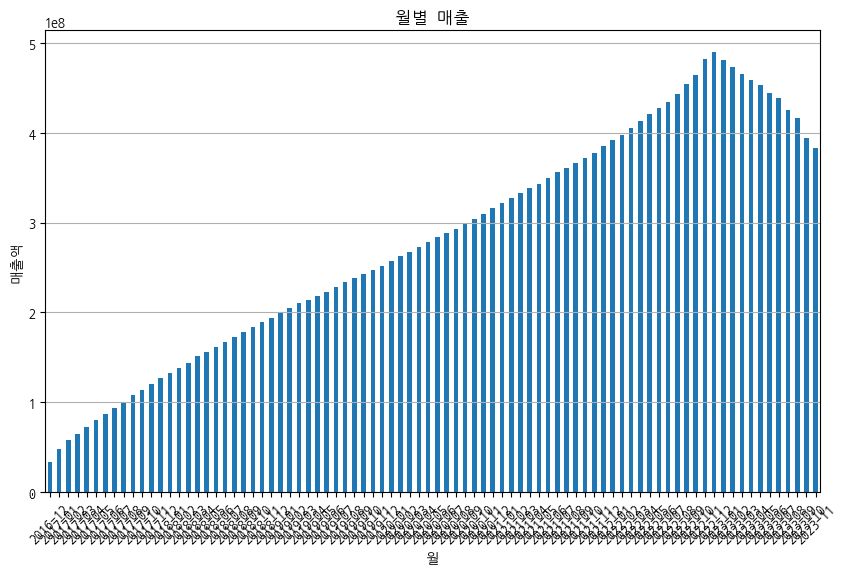

In [148]:
# 월별 매출 계산
monthly_revenue = df.groupby(df['과금일'].dt.to_period('M'))['과금액'].sum()

# 결과 출력
print(monthly_revenue)

# 시각화
monthly_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('월별 매출')
plt.xlabel('월')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

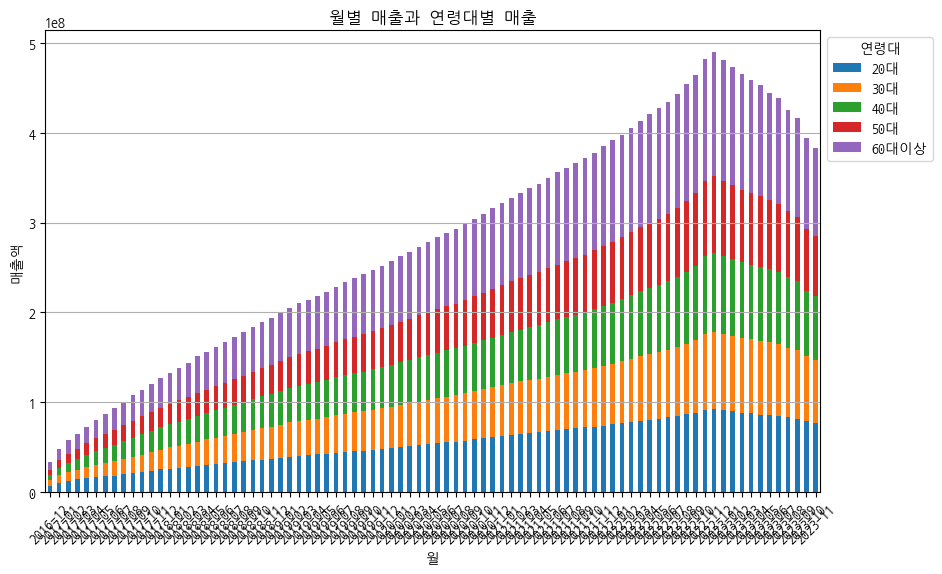

In [149]:
# 과금일을 날짜형으로 변환
df['과금일'] = pd.to_datetime(df['과금일'])

# 연령대와 월별 매출 데이터프레임 생성
revenue_by_age_month = pd.crosstab(index=df['과금일'].dt.to_period('M'), columns=df['연령_bin'], values=df['과금액'], aggfunc='sum')

# 결과 출력
#print(revenue_by_age_month)

# 시각화
revenue_by_age_month.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('월별 매출과 연령대별 매출')
plt.xlabel('월')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.legend(title='연령대', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()


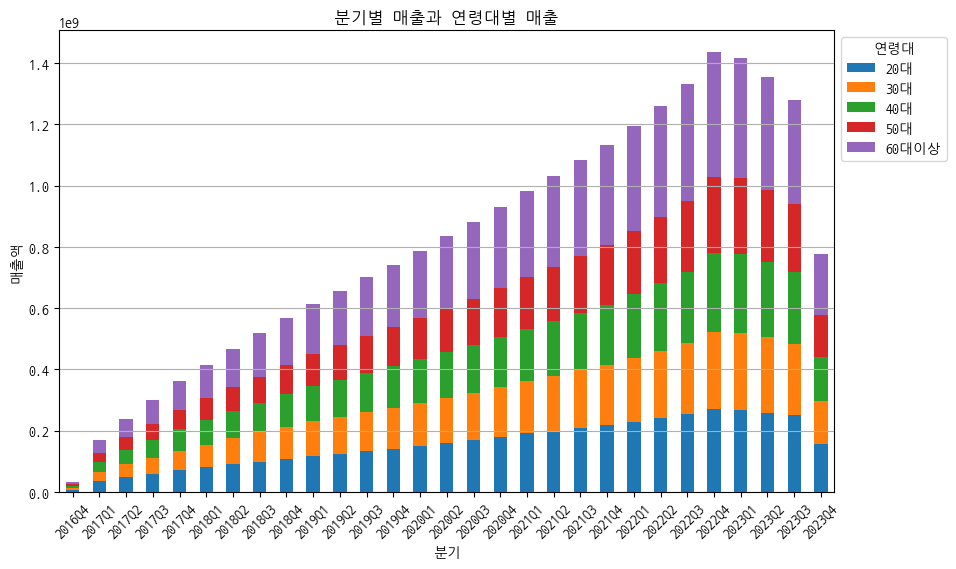

In [150]:
# 분기 정보 추가
df['분기'] = df['과금일'].dt.to_period('Q')

# 연령대와 분기별 매출 데이터프레임 생성
revenue_by_age_quarter = pd.crosstab(index=df['분기'], columns=df['연령_bin'], values=df['과금액'], aggfunc='sum')

# 결과 출력
#print(revenue_by_age_quarter)

# 시각화
revenue_by_age_quarter.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('분기별 매출과 연령대별 매출')
plt.xlabel('분기')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.legend(title='연령대', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

In [151]:
df.columns

Index(['고객ID', '과금일', '과금액', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '영수증발급여부',
       '과금방식', '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량', '과금월수', '분기',
       '과금월수_bin', '연령_bin'],
      dtype='object')

성별             남성         여성
분기                          
2016Q4   16924600   16744100
2017Q1   85539100   83945200
2017Q2  122244400  117025600
2017Q3  152622900  148601400
2017Q4  184804400  176343200
2018Q1  210302500  204336800
2018Q2  235736300  231992900
2018Q3  260115200  256951000
2018Q4  285896800  280769800
2019Q1  308282700  304946600
2019Q2  329538800  326208800
2019Q3  350167200  349878000
2019Q4  371655800  369337500
2020Q1  395139100  391430200
2020Q2  419884700  415547000
2020Q3  445025400  434921300
2020Q4  469764700  459468200
2021Q1  495417100  487144000
2021Q2  521249200  509755000
2021Q3  549265700  533529600
2021Q4  574150200  560004200
2022Q1  602768900  591875400
2022Q2  637318900  623673200
2022Q3  671161100  660201000
2022Q4  723961300  712937400
2023Q1  713087500  705294200
2023Q2  685546800  670636000
2023Q3  648416700  632027300
2023Q4  391694300  384962700


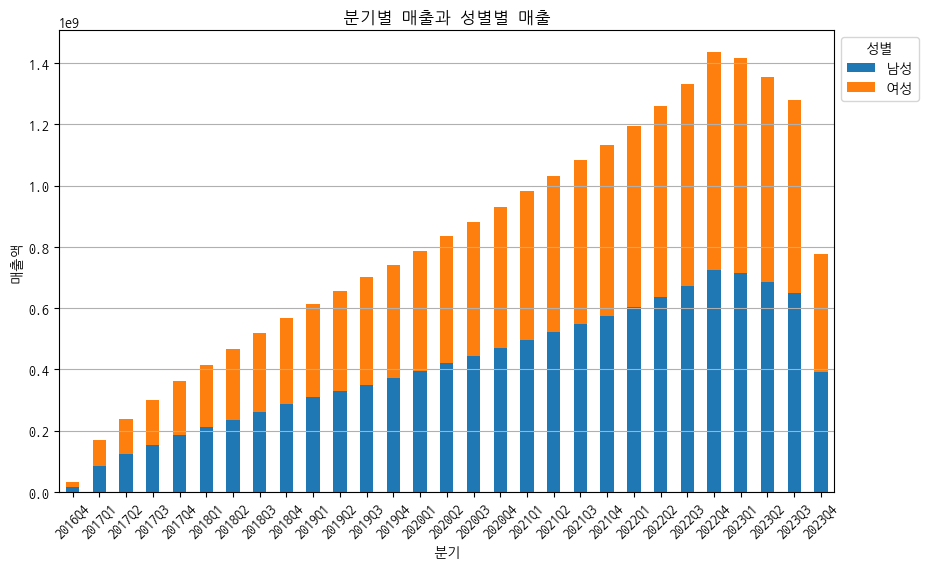

In [152]:
# 분기 정보 추가
df['분기'] = df['과금일'].dt.to_period('Q')

# 연령대와 분기별 매출 데이터프레임 생성
revenue_by_age_quarter = pd.crosstab(index=df['분기'], columns=df['성별'], values=df['과금액'], aggfunc='sum')

# 결과 출력
print(revenue_by_age_quarter)

# 시각화
revenue_by_age_quarter.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('분기별 매출과 성별별 매출')
plt.xlabel('분기')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.legend(title='성별', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

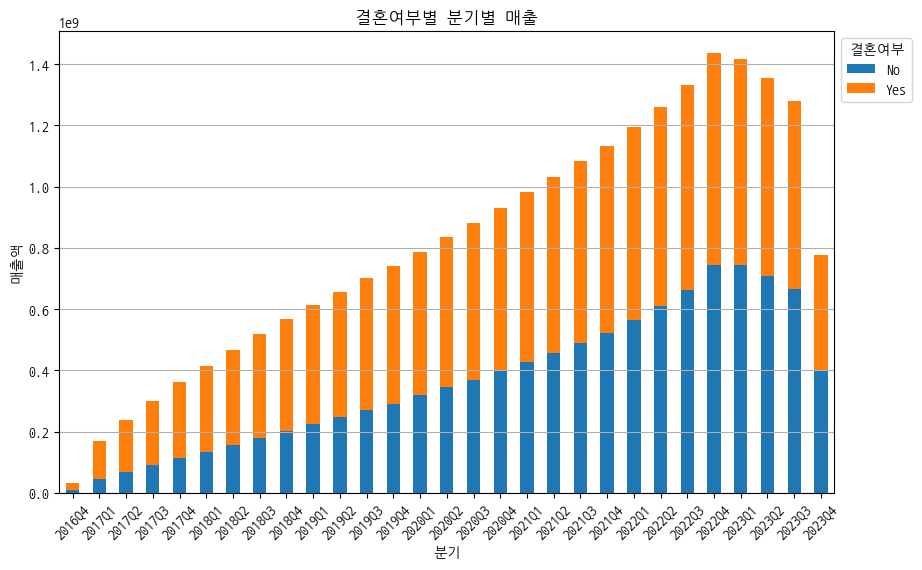

In [153]:
# 분기 정보 추가
df['분기'] = df['과금일'].dt.to_period('Q')

# 연령대와 분기별 매출 데이터프레임 생성
revenue_by_age_quarter = pd.crosstab(index=df['분기'], columns=df['결혼여부'], values=df['과금액'], aggfunc='sum')

# 시각화
revenue_by_age_quarter.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('결혼여부별 분기별 매출')
plt.xlabel('분기')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.legend(title='결혼여부', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

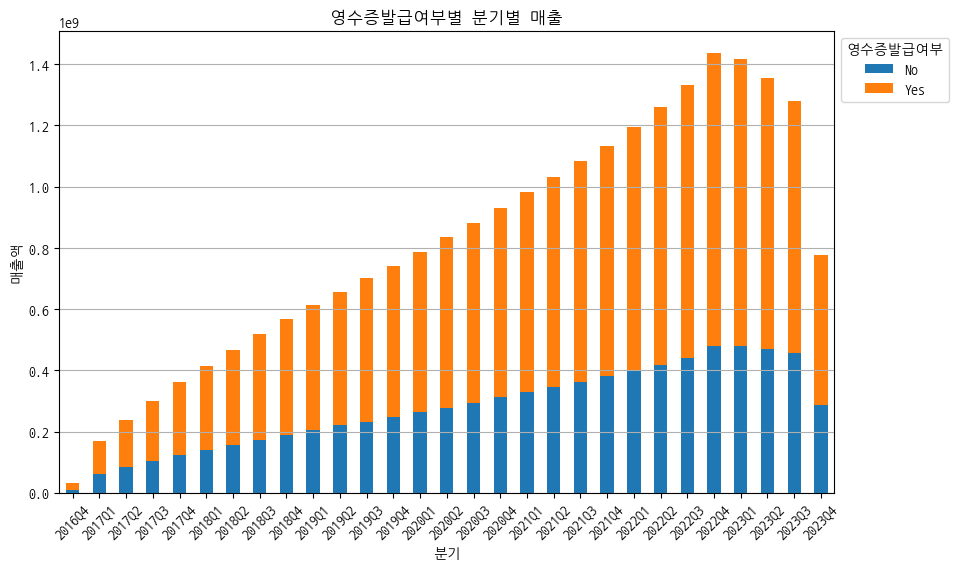

In [154]:
# 분기 정보 추가
df['분기'] = df['과금일'].dt.to_period('Q')

# 연령대와 분기별 매출 데이터프레임 생성
revenue_by_age_quarter = pd.crosstab(index=df['분기'], columns=df['영수증발급여부'], values=df['과금액'], aggfunc='sum')

# 시각화
revenue_by_age_quarter.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('영수증발급여부별 분기별 매출')
plt.xlabel('분기')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.legend(title='영수증발급여부', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

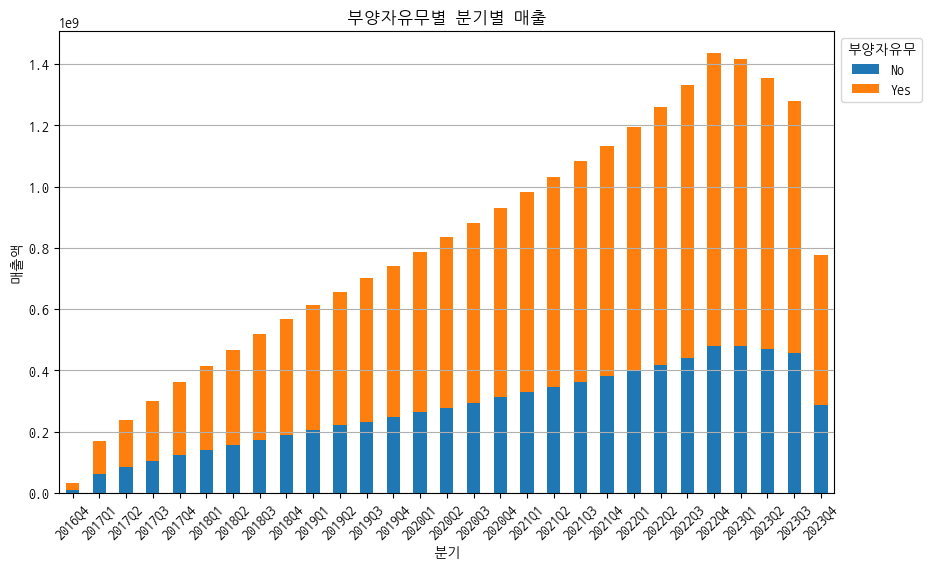

In [155]:
# 분기 정보 추가
df['분기'] = df['과금일'].dt.to_period('Q')

# 연령대와 분기별 매출 데이터프레임 생성
revenue_by_age_quarter = pd.crosstab(index=df['분기'], columns=df['영수증발급여부'], values=df['과금액'], aggfunc='sum')

# 결과 출력
#print(revenue_by_age_quarter)

# 시각화
revenue_by_age_quarter.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('부양자유무별 분기별 매출')
plt.xlabel('분기')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.legend(title='부양자유무', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

과금월수_bin       Q3~max        Q2~Q3        Q1~Q2       min~Q1
분기                                                          
2016Q4     33668700.0          NaN          NaN          NaN
2017Q1    169484300.0          NaN          NaN          NaN
2017Q2    239270000.0          NaN          NaN          NaN
2017Q3    300752900.0     471400.0          NaN          NaN
2017Q4    358724800.0    2422800.0          NaN          NaN
2018Q1    408242800.0    6396500.0          NaN          NaN
2018Q2    450101700.0   17627500.0          NaN          NaN
2018Q3    454561500.0   62504700.0          NaN          NaN
2018Q4    454525100.0  112141500.0          NaN          NaN
2019Q1    454267700.0  158961600.0          NaN          NaN
2019Q2    454309300.0  201438300.0          NaN          NaN
2019Q3    454261800.0  245783400.0          NaN          NaN
2019Q4    454551000.0  285182700.0    1259600.0          NaN
2020Q1    454266000.0  327240700.0    5062600.0          NaN
2020Q2    454240400.0  3

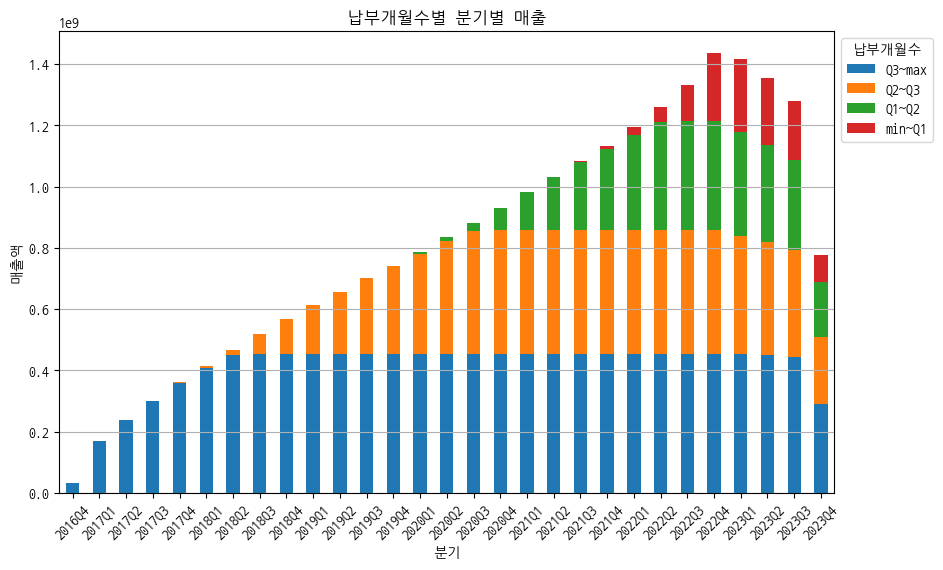

In [161]:
# 분기 정보 추가
df['분기'] = df['과금일'].dt.to_period('Q')

# 연령대와 분기별 매출 데이터프레임 생성
revenue_by_age_quarter = pd.crosstab(index=df['분기'], columns=df['과금월수_bin'], values=df['과금액'], aggfunc='sum')
new_order = ['Q3~max', 'Q2~Q3', 'Q1~Q2', 'min~Q1']

# 열 순서를 변경한 데이터프레임
revenue_by_age_quarter = revenue_by_age_quarter[new_order]
# 결과 출력
print(revenue_by_age_quarter)

# 시각화
revenue_by_age_quarter.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('납부개월수별 분기별 매출')
plt.xlabel('분기')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.legend(title='납부개월수', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

과금일
2016      33668700
2017    1071126200
2018    1966101300
2019    2710015400
2020    3431180600
2021    4230515000
2022    5223897200
2023    4831665500
Freq: A-DEC, Name: 과금액, dtype: int64


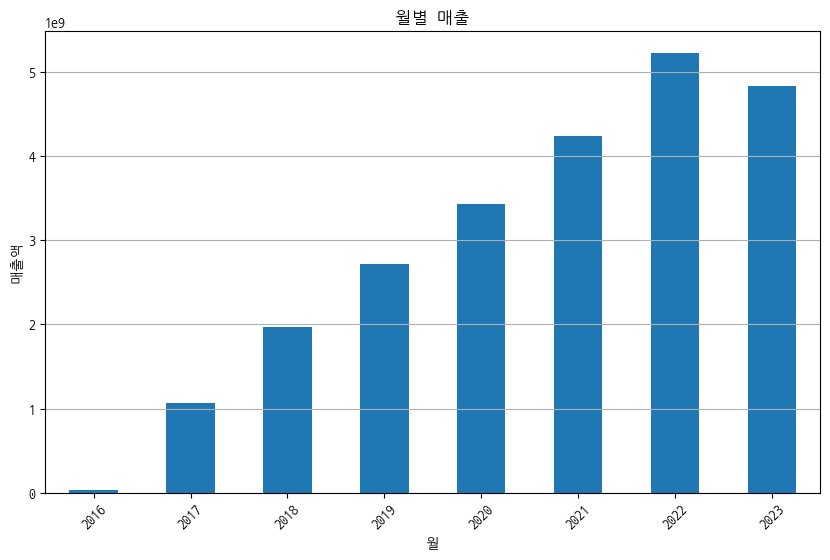

In [163]:
# 월별 매출 계산
yearly_revenue = df.groupby(df['과금일'].dt.to_period('Y'))['과금액'].sum()

# 결과 출력
print(yearly_revenue)

# 시각화
yearly_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('월별 매출')
plt.xlabel('월')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [164]:
df.head()

,고객ID,과금일,과금액,성별,연령,결혼여부,부양자유무,부양자수,영수증발급여부,과금방식,보안서비스,백업서비스,기술지원서비스,데이터무제한,데이터사용량,과금월수,분기,과금월수_bin,연령_bin
0,C-10001,2022-03-01,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q1,Q1~Q2,30대
1,C-10001,2022-04-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q2,Q1~Q2,30대
2,C-10001,2022-05-01,85700,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q2,Q1~Q2,30대
3,C-10001,2022-06-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q2,Q1~Q2,30대
4,C-10001,2022-07-01,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q3,Q1~Q2,30대


In [170]:
df.head()

,고객ID,과금일,과금액,성별,연령,결혼여부,부양자유무,부양자수,영수증발급여부,과금방식,보안서비스,백업서비스,기술지원서비스,데이터무제한,데이터사용량,과금월수,분기,과금월수_bin,연령_bin
0,C-10001,2022-03-01,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q1,Q1~Q2,30대
1,C-10001,2022-04-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q2,Q1~Q2,30대
2,C-10001,2022-05-01,85700,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q2,Q1~Q2,30대
3,C-10001,2022-06-01,83500,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q2,Q1~Q2,30대
4,C-10001,2022-07-01,84600,여성,37,Yes,No,0,Yes,신용카드,No,Yes,Yes,Yes,16,21,2022Q3,Q1~Q2,30대


In [190]:
# 과금일을 datetime 형식으로 변환
df['과금일'] = pd.to_datetime(df['과금일'])

# 고객ID별로 가장 빠른 과금일 찾기
df['최초과금일'] = df.groupby('고객ID')['과금일'].transform('min')

# 신규/장기 분류
df['고객분류'] = df['최초과금일'].apply(lambda x: '신규(2년이하)' if x >= pd.Timestamp('2022-01-01') else '장기(2년이상)')
df.columns

Index(['고객ID', '과금일', '과금액', '성별', '연령', '결혼여부', '부양자유무', '부양자수', '영수증발급여부',
       '과금방식', '보안서비스', '백업서비스', '기술지원서비스', '데이터무제한', '데이터사용량', 'LTV',
       'LTV>=4000', '분기', '최초과금일', '고객분류'],
      dtype='object')

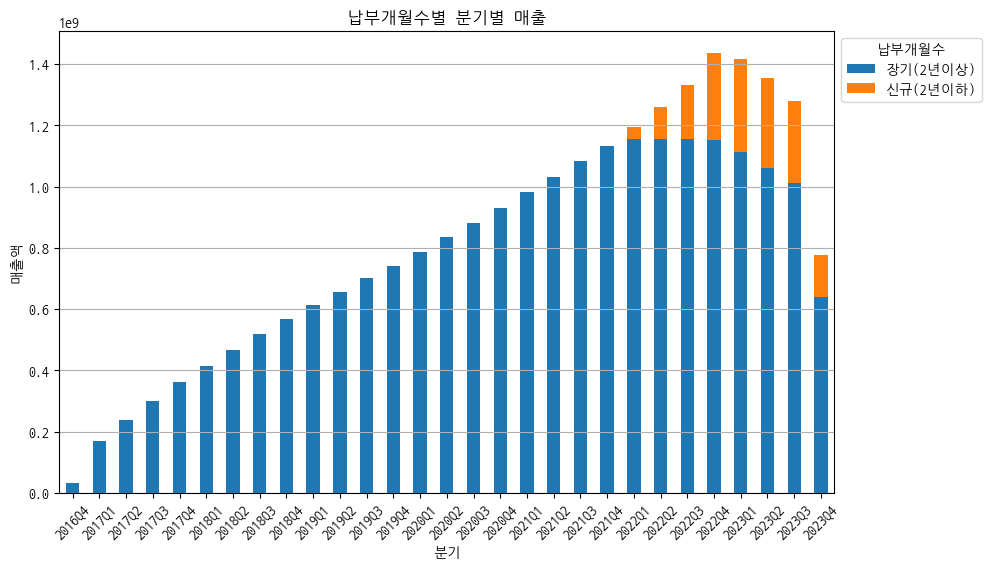

In [192]:
# 분기 정보 추가
df['분기'] = df['과금일'].dt.to_period('Q')

# 연령대와 분기별 매출 데이터프레임 생성
revenue_by_customer_type = pd.crosstab(index=df['분기'], columns=df['고객분류'], values=df['과금액'], aggfunc='sum')

# 열 순서를 변경한 데이터프레임
new_order = ["장기(2년이상)", "신규(2년이하)"]
revenue_by_customer_type = revenue_by_customer_type[new_order]
# 결과 출력
#print(revenue_by_customer_type)

# 시각화
revenue_by_customer_type.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('납부개월수별 분기별 매출')
plt.xlabel('분기')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.legend(title='납부개월수', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

In [181]:
df["LTV>=4000"] = df["LTV"].apply(lambda x : 1 if x >= 4000 else 0)

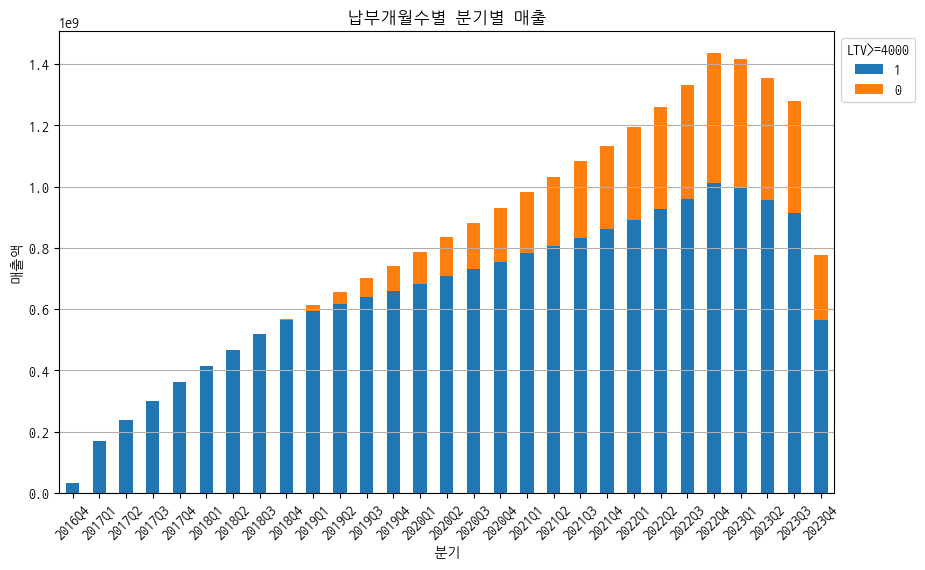

In [187]:
# 분기 정보 추가
df['분기'] = df['과금일'].dt.to_period('Q')

# 연령대와 분기별 매출 데이터프레임 생성
revenue_by_customer_type = pd.crosstab(index=df['분기'], columns=df['LTV>=4000'], values=df['과금액'], aggfunc='sum')

# 열 순서를 변경한 데이터프레임
new_order = [1, 0]
revenue_by_customer_type = revenue_by_customer_type[new_order]
# 결과 출력
#print(revenue_by_customer_type)

# 시각화
revenue_by_customer_type.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('납부개월수별 분기별 매출')
plt.xlabel('분기')
plt.ylabel('매출액')
plt.xticks(rotation=45)
plt.legend(title='LTV>=4000', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()

In [189]:
df.describe()

,과금액,연령,부양자수,데이터사용량,LTV,LTV>=4000
count,291334.000000,291334.000000,291334.000000,291334.000000,291334.000000,291334.000000
mean,80657.149183,46.510843,0.482652,20.993238,4697.148922,0.783156
std,36946.287002,16.541125,0.933860,20.767967,1112.606828,0.412096
min,18900.000000,20.000000,0.000000,0.000000,2003.000000,0.000000
25%,47900.000000,32.000000,0.000000,3.000000,4101.000000,1.000000
50%,88700.000000,46.000000,0.000000,17.000000,4844.000000,1.000000
75%,112100.000000,59.000000,0.000000,27.000000,5565.000000,1.000000
max,143200.000000,80.000000,4.000000,85.000000,6500.000000,1.000000
